In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import dtale

In [2]:
data=pd.read_csv("newnewdrug.csv")

In [3]:
data.head()

,Name,Age,Race,gender,sideEffects,drugname
0,James Green,47,Hispanic,F,Extremely Severe Side Effects,solodyn
1,Mr. Mason Mcbride,44,White,F,Severe Side Effects,estrace
2,Jason King,22,Hispanic,M,Severe Side Effects,pamelor
3,Stephanie Smith,41,Black,M,Severe Side Effects,renova
4,Diane Aguilar,58,White,M,Extremely Severe Side Effects,lexapro


In [4]:
data.shape

(80000, 6)

In [5]:
# dtale.show(data)

In [6]:
data.isna().sum()

Name           0
Age            0
Race           0
gender         0
sideEffects    0
drugname       0
dtype: int64

In [7]:
for i in data.columns:
    print(i,data[i].nunique())

Name 59569
Age 49
Race 4
gender 2
sideEffects 5
drugname 502


In [8]:
data.drop('Name',axis=1,inplace=True)

In [9]:
onehot=data[['gender','Race']]

In [10]:
onehot=pd.get_dummies(onehot)

In [11]:
data_conc=pd.concat([data,onehot],axis=1)

In [12]:
data_conc.head()

,Age,Race,gender,sideEffects,drugname,gender_F,gender_M,Race_Asian,Race_Black,Race_Hispanic,Race_White
0,47,Hispanic,F,Extremely Severe Side Effects,solodyn,1,0,0,0,1,0
1,44,White,F,Severe Side Effects,estrace,1,0,0,0,0,1
2,22,Hispanic,M,Severe Side Effects,pamelor,0,1,0,0,1,0
3,41,Black,M,Severe Side Effects,renova,0,1,0,1,0,0
4,58,White,M,Extremely Severe Side Effects,lexapro,0,1,0,0,0,1


In [13]:
data_conc.drop(['gender','Race'],axis=1,inplace=True)

In [14]:
data_conc.columns

Index(['Age', 'sideEffects', 'drugname', 'gender_F', 'gender_M', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_White'],
      dtype='object')

In [15]:
cols=['drugname']

In [16]:
for x in cols:
    data_conc[x]=pd.factorize(data_conc[x])[0]

In [17]:
data_conc.head()

,Age,sideEffects,drugname,gender_F,gender_M,Race_Asian,Race_Black,Race_Hispanic,Race_White
0,47,Extremely Severe Side Effects,0,1,0,0,0,1,0
1,44,Severe Side Effects,1,1,0,0,0,0,1
2,22,Severe Side Effects,2,0,1,0,0,1,0
3,41,Severe Side Effects,3,0,1,0,1,0,0
4,58,Extremely Severe Side Effects,4,0,1,0,0,0,1


In [18]:
data_conc.columns

Index(['Age', 'sideEffects', 'drugname', 'gender_F', 'gender_M', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_White'],
      dtype='object')

In [19]:
x=data_conc.drop('sideEffects',axis=1)
y=data_conc['sideEffects']

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [21]:
# dtale.show(x)

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

## Data modeling

### Logistic regression

In [23]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred = logit_model.predict(X_test)

C:\Users\Vinay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# print('Confusion_matrix is :\n',confusion_matrix(y_test,y_pred))
print('Classification report :\n' ,classification_report(y_test,y_pred))

Classification report :
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.28      0.64      0.39      4813
            Mild Side Effects       0.20      0.02      0.04      4674
        Moderate Side Effects       0.18      0.05      0.08      4796
              No Side Effects       0.27      0.52      0.36      4874
          Severe Side Effects       0.21      0.07      0.11      4843

                     accuracy                           0.26     24000
                    macro avg       0.23      0.26      0.20     24000
                 weighted avg       0.23      0.26      0.20     24000



### Gussian Naive Bayes Classifier

In [25]:
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [26]:
y_pred=classifier.predict(X_test)
print('Classification report :\n' ,classification_report(y_test,y_pred))

Classification report :
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.26      0.75      0.39      4813
            Mild Side Effects       0.22      0.10      0.13      4674
        Moderate Side Effects       0.19      0.03      0.06      4796
              No Side Effects       0.31      0.37      0.34      4874
          Severe Side Effects       0.24      0.08      0.12      4843

                     accuracy                           0.27     24000
                    macro avg       0.24      0.27      0.21     24000
                 weighted avg       0.24      0.27      0.21     24000



**Bernouli Naive Bayes Classifier**

In [27]:
classifier=BernoulliNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("classification report : \n",classification_report(y_test,y_pred))

classification report : 
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.20      0.25      0.22      4813
            Mild Side Effects       0.20      0.13      0.16      4674
        Moderate Side Effects       0.20      0.38      0.26      4796
              No Side Effects       0.21      0.13      0.16      4874
          Severe Side Effects       0.20      0.12      0.15      4843

                     accuracy                           0.20     24000
                    macro avg       0.20      0.20      0.19     24000
                 weighted avg       0.20      0.20      0.19     24000



**SVM**

**Linear SVM**

In [ ]:
classifier=SVC(kernel="linear",random_state=123)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

**POLYNOMIAL SVM**

In [ ]:
svm_po=SVC(kernel='poly',degree=3,random_state=123)
svm_po.fit(X_train,y_train)
y_pred=svm_po.predict(X_test)
print("Classification report :\n",classification_report(y_test,y_pred))

**Radial SVM**

In [ ]:
svm_ra=SVC(kernel='rbf',random_state=123)
svm_ra.fit(X_train,y_train)
y_pred=svm_ra.predict(X_test)
print("Classification report \n",classification_report(y_test,y_pred))

**KNN algorithm**

In [34]:
acc_values=[]
neighbors=np.arange(1,16)
for i in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=i,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

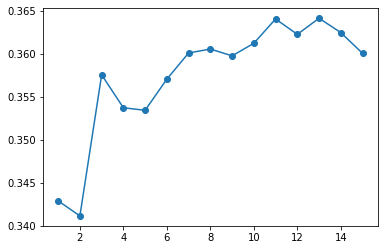

In [35]:
plt.plot(range(1,16),acc_values,'-o')
plt.show()

In [37]:
classifier=KNeighborsClassifier(n_neighbors=11,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Classification report\n",classification_report(y_test,y_pred))

Classification report
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.38      0.66      0.49      4813
            Mild Side Effects       0.33      0.29      0.31      4674
        Moderate Side Effects       0.31      0.27      0.29      4796
              No Side Effects       0.43      0.29      0.35      4874
          Severe Side Effects       0.36      0.31      0.33      4843

                     accuracy                           0.36     24000
                    macro avg       0.36      0.36      0.35     24000
                 weighted avg       0.36      0.36      0.35     24000



**Decision Tree**

In [31]:
clf=DecisionTreeClassifier(random_state=123)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Classification report: \n",classification_report(y_test,y_pred))

Classification report: 
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.47      0.53      0.50      4813
            Mild Side Effects       0.41      0.44      0.43      4674
        Moderate Side Effects       0.39      0.39      0.39      4796
              No Side Effects       0.51      0.49      0.50      4874
          Severe Side Effects       0.46      0.40      0.43      4843

                     accuracy                           0.45     24000
                    macro avg       0.45      0.45      0.45     24000
                 weighted avg       0.45      0.45      0.45     24000



In [32]:
clf=DecisionTreeClassifier(criterion='entropy',random_state=123,min_samples_split=30,max_depth=300)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Classification matrix: \n",classification_report(y_test,y_pred))

Classification matrix: 
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.45      0.70      0.55      4813
            Mild Side Effects       0.47      0.40      0.43      4674
        Moderate Side Effects       0.42      0.38      0.40      4796
              No Side Effects       0.61      0.45      0.51      4874
          Severe Side Effects       0.47      0.44      0.45      4843

                     accuracy                           0.47     24000
                    macro avg       0.48      0.47      0.47     24000
                 weighted avg       0.48      0.47      0.47     24000



**Random forest Classifier**

In [33]:
rf=RandomForestClassifier(random_state=123)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Classification report : \n",classification_report(y_test,y_pred))

Classification report : 
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.35      0.36      0.36      4813
            Mild Side Effects       0.26      0.26      0.26      4674
        Moderate Side Effects       0.27      0.27      0.27      4796
              No Side Effects       0.31      0.30      0.31      4874
          Severe Side Effects       0.29      0.30      0.30      4843

                     accuracy                           0.30     24000
                    macro avg       0.30      0.30      0.30     24000
                 weighted avg       0.30      0.30      0.30     24000



**Gradient Boosting**

In [28]:
classifier=GradientBoostingClassifier(random_state=123)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.39      0.82      0.53      4813
            Mild Side Effects       0.47      0.32      0.38      4674
        Moderate Side Effects       0.41      0.26      0.32      4796
              No Side Effects       0.62      0.37      0.46      4874
          Severe Side Effects       0.42      0.41      0.42      4843

                     accuracy                           0.44     24000
                    macro avg       0.46      0.44      0.42     24000
                 weighted avg       0.46      0.44      0.42     24000



**Xg Boost**

In [29]:
xgbc=XGBClassifier(random_state=123)
xgbc.fit(X_train,y_train)
y_pred=xgbc.predict(X_test)
print("Classification report : \n",classification_report(y_test,y_pred))

C:\Users\Vinay\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:28:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report : 
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.44      0.97      0.61      4813
            Mild Side Effects       0.62      0.35      0.45      4674
        Moderate Side Effects       0.49      0.36      0.42      4796
              No Side Effects       0.76      0.41      0.53      4874
          Severe Side Effects       0.52      0.49      0.50      4843

                     accuracy                           0.52     24000
                    macro avg       0.56      0.52      0.50     24000
                 weighted avg       0.56      0.52      0.50     24000



In [ ]:
svm_ra=SVC(kernel='rbf',C=20)
svm_ra.fit(X_train,y_train)
y_pred=svm_ra.predict(X_test)
print("Classification report \n",classification_report(y_test,y_pred))

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, max_features=7)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Classification report \n",classification_report(y_test,y_pred))

Classification report 
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.48      0.52      0.50      4813
            Mild Side Effects       0.42      0.43      0.42      4674
        Moderate Side Effects       0.39      0.39      0.39      4796
              No Side Effects       0.51      0.48      0.50      4874
          Severe Side Effects       0.45      0.42      0.44      4843

                     accuracy                           0.45     24000
                    macro avg       0.45      0.45      0.45     24000
                 weighted avg       0.45      0.45      0.45     24000



In [27]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100, random_state=123)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Classification report \n",classification_report(y_test,y_pred))

Classification report 
                                precision    recall  f1-score   support

Extremely Severe Side Effects       0.31      0.72      0.44      4813
            Mild Side Effects       0.29      0.19      0.23      4674
        Moderate Side Effects       0.22      0.12      0.15      4796
              No Side Effects       0.37      0.27      0.31      4874
          Severe Side Effects       0.29      0.21      0.24      4843

                     accuracy                           0.30     24000
                    macro avg       0.30      0.30      0.27     24000
                 weighted avg       0.30      0.30      0.28     24000

